<a href="https://colab.research.google.com/github/MochNad/Pembelajaran-Mesin/blob/main/Job_Sheet_11_(Praktikum%20%2B%20Tugas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Pembelajaran Mesin - Job Sheet 11: Convolutional Neural Network (CNN)**
*   Nama : Moch. Nadi Rafli Maulana
*   NIM : 2141720188
*   No. Absen : 18
*   Kelas : TI-3B
*   Jurusan / Prodi : Teknologi Informasi / D4 - Teknik Informatika

> # **🍑 Praktikum 1** *Klasifikasi 🐱 dan 🐶*

**Deskripsi**

*Pada praktikum ini kita akan membuat model klasifikasi CNN sederhana pada kasus citra kucing dan anjing.*

**Dataset**

*Dataset merupakan data citra anjing dan kucing yang telah dibagi menjadi data training dan data testing. Dikarenakan data cukup besar, pastikan koneksi Anda sebelum mengunduh dataset.*

[DOWNLOAD](https://drive.google.com/file/d/1vYrqBI1VmiXXJd5sgtKK2nuQvC8T1ryb/view?usp=drive_link)

**🍌 Langkah 1 - Import Library**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Pembelajaran Mesin/dataset.zip', 'r') as zipobj:
  zipobj.extractall('/content/drive/MyDrive/Pembelajaran Mesin')

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

**🍌 Langkah 2 - Pra Pengolahan Data**

*Pada tahap ini kita akan sedikit melakukan manipulasi pada citra yang digunakan. Manipulasi yang dilakukan diantaranya adalah normalisasi nilai piksel, koreksi kemiringan, pembesaran (zoom), dan flip.*

**Langkah 2.1. Pra Pengolahan Data Training**

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Pembelajaran Mesin/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


**Langkah 2.2. Pra Pengolahan Data Testing**

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Pembelajaran Mesin/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


**🍌 Langkah 3 - Pembuatan Model CNN**

**Langkah 3.1.  - Inisiasi Model CNN**

In [6]:
cnn = tf.keras.models.Sequential()

**Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

**Langkah 3.3 - Pembuatan Layer Pooling 1**

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

**Langkah 3.5 - Flattening**

In [10]:
cnn.add(tf.keras.layers.Flatten())

**Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

**Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

**Langkah 3.8 - Compile Model CNN**

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

*Penggunaan **loss function binary crossentropy** dikarenakan kita hanya melakukan klasifikasi pada dua kelas, yaitu kucing dan anjing.*

**🍌 Langkah 4 - Fit CNN**

In [14]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 77s 305ms/step - loss: 0.6560 - accuracy: 0.6080 - val_loss: 0.5916 - val_accuracy: 0.6870
Epoch 2/25
250/250 [==============================] - 75s 300ms/step - loss: 0.5960 - accuracy: 0.6760 - val_loss: 0.5553 - val_accuracy: 0.7210
Epoch 3/25
250/250 [==============================] - 73s 291ms/step - loss: 0.5463 - accuracy: 0.7250 - val_loss: 0.5181 - val_accuracy: 0.7405
Epoch 4/25
250/250 [==============================] - 72s 290ms/step - loss: 0.5223 - accuracy: 0.7431 - val_loss: 0.4973 - val_accuracy: 0.7555
Epoch 5/25
250/250 [==============================] - 74s 296ms/step - loss: 0.4956 - accuracy: 0.7548 - val_loss: 0.5393 - val_accuracy: 0.7480
Epoch 6/25
250/250 [==============================] - 74s 295ms/step - loss: 0.4817 - accuracy: 0.7681 - val_loss: 0.4879 - val_accuracy: 0.7620
Epoch 7/25
250/250 [==============================] - 75s 299ms/step - loss: 0.4691 - accuracy: 0.7747 - val_loss: 0.5217 - val_ac

**🍌 Langkah 5 - Prediksi dengan 1 Citra**

*Pada langkah ini, kita akan mencoba melakukan prediksi pada 1 citra anjing dan kucing.*

In [15]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/Pembelajaran Mesin/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 [==============================] - 0s 151ms/step


> # **🍑 Praktikum 2** *Klasifikasi Multi-label dengan Data CIFAT*

*Desclaimer: Praktikum ini merupakan tutorial CNN dari Tensorflow yang dapat diakses pada laman https://www.tensorflow.org/tutorials/images/cnn*

**Deskripsi**

*Pada praktikum ini kita akan membuat model CNN untuk mengklasifikasikan 10 objek dari dataset CIFAR. Dataset terdiri dari 60.000 citra dan setiap label terdiri dari 6.000 citra. Dataset telah dibagi menjadi 50.000 data training dan 10.000 data testing.*

**🍌 Langkah 1 - Load Library**

In [16]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

**🍌 Langkah 2 - Unduh Dataset CIFAR**

In [17]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


**🍌 Langkah 3 - Verifikasi Data**

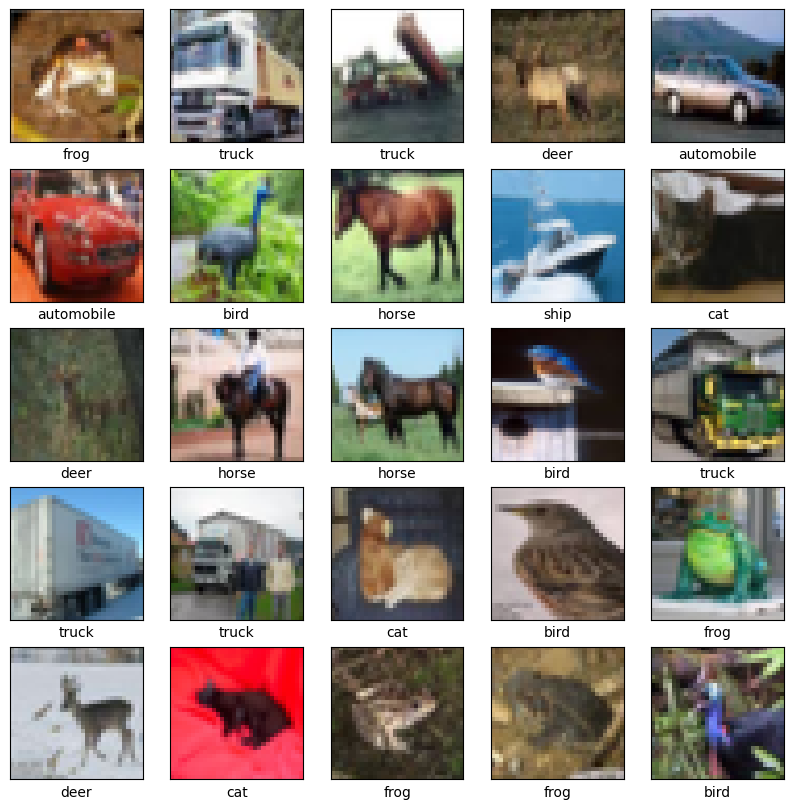

In [18]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

**🍌 Langkah 4 - Buat Model CNN**

**Langkah 4.1. - Buat Layer Konvolusi**

In [19]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Langkah 4.2. - Cek Arsitektur Konvolusi**

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

**Langkah 4.3. - Tambahkan Layer Fully Connected**

In [21]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

**Langkah 4.4. - Cek Arsitektur Model CNN**

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**🍌 Langkah 5 - Fit Model**

In [23]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 73s 46ms/step - loss: 1.5667 - accuracy: 0.4226 - val_loss: 1.3437 - val_accuracy: 0.5228
Epoch 2/10
1563/1563 [==============================] - 66s 43ms/step - loss: 1.2003 - accuracy: 0.5728 - val_loss: 1.1327 - val_accuracy: 0.6013
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0531 - accuracy: 0.6287 - val_loss: 1.0782 - val_accuracy: 0.6195
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9605 - accuracy: 0.6646 - val_loss: 1.0103 - val_accuracy: 0.6441
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8968 - accuracy: 0.6852 - val_loss: 0.9450 - val_accuracy: 0.6695
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8404 - accuracy: 0.7050 - val_loss: 0.9238 - val_accuracy: 0.6814
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8007 - accuracy: 0.7175 - val_loss: 0.8949 -

**🍌 Langkah 6 - Evaluasi Model**

313/313 - 5s - loss: 0.8621 - accuracy: 0.7103 - 5s/epoch - 15ms/step


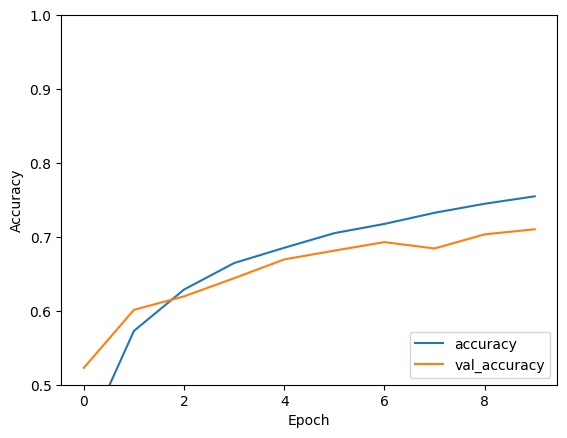

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

**🍌 Langkah 7 - Cetak Hasil Akurasi**

In [25]:
print(test_acc)

0.7103000283241272


*Berapa akurasi yang Anda dapatkan?*

> # **🍑 Tugas**

* *Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.*
* *Buatlah model CNN untuk klasifikasi dataset MNIST.*

**Langkah 1: Memuat Data dan Praproses**

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Memuat data CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi piksel ke rentang 0 hingga 1
train_images, test_images = train_images / 255.0, test_images / 255.0

**Langkah 2: Membangun Model CNN**

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.5))  # Menambahkan lapisan dropout

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Menambahkan lapisan dropout
model.add(layers.Dense(10))

**Langkah 3: Kompilasi Model**

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Langkah 4: Augmentasi Data**

In [29]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
datagen.fit(train_images)

**Langkah 5: Pelatihan Model**

In [30]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32),
                    epochs=50, validation_data=(test_images, test_labels))

Epoch 1/50
1563/1563 [==============================] - 97s 62ms/step - loss: 1.7912 - accuracy: 0.1163 - val_loss: 1.3938 - val_accuracy: 0.0718
Epoch 2/50
1563/1563 [==============================] - 98s 63ms/step - loss: 1.4998 - accuracy: 0.0952 - val_loss: 1.2934 - val_accuracy: 0.1048
Epoch 3/50
1563/1563 [==============================] - 101s 65ms/step - loss: 1.3904 - accuracy: 0.0951 - val_loss: 1.1655 - val_accuracy: 0.0675
Epoch 4/50
1563/1563 [==============================] - 96s 61ms/step - loss: 1.3317 - accuracy: 0.0948 - val_loss: 1.1071 - val_accuracy: 0.0975
Epoch 5/50
1563/1563 [==============================] - 94s 60ms/step - loss: 1.2770 - accuracy: 0.0971 - val_loss: 1.0738 - val_accuracy: 0.0808
Epoch 6/50
1563/1563 [==============================] - 95s 61ms/step - loss: 1.2383 - accuracy: 0.0952 - val_loss: 1.0525 - val_accuracy: 0.0722
Epoch 7/50
1563/1563 [==============================] - 97s 62ms/step - loss: 1.2096 - accuracy: 0.0954 - val_loss: 1.0486 

**Langkah 6: Visualisasi Hasil Pelatihan**

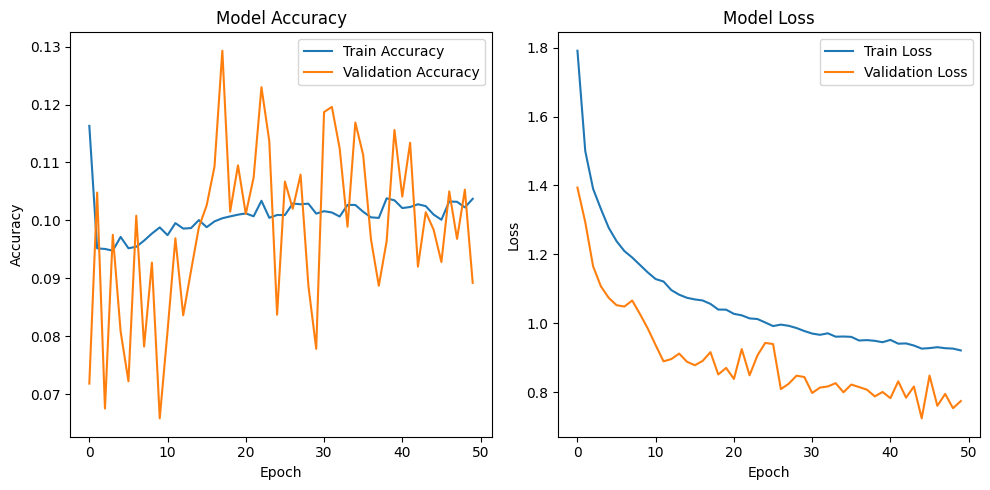

In [38]:
import matplotlib.pyplot as plt

# Membuat tampilan subplot dengan 2 baris dan 1 kolom
plt.figure(figsize=(10, 5))

# Subplot 1: Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Subplot 2: Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Menampilkan tampilan subplot
plt.tight_layout()
plt.show()

**Langkah 7: Pengujian Model**

In [39]:
# Pengujian Model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Test accuracy:", test_acc)

313/313 - 5s - loss: 0.7744 - accuracy: 0.0892 - 5s/epoch - 15ms/step
Test accuracy: 0.08919999748468399
